# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание проекта

В проекте требуется:
- изучить следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры, близость к центру. 
- определить, какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения: дня недели, месяца и года.
- выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
- изучить, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- выделить сегмент квартир в центре. Проанализировать эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
real_estate.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
real_estate.duplicated().sum()

0

Вывод из первичных данных

при простом чтении таблицы выводится в неудобом виде, необходимо при чтении сразу ввести разделители, что и было добавлено в код.
- first_day_exposition - меняем тип с object в datetime
Наблюдаем пропуски в:
- ceiling_height - высота потолков, данные, вероятно, не внесены, заменим на средние
- is_apartment - почти везде данные отсутствуют, есть только 10% данных, тип данных object поменяем на bool, т.к. мы имеем дело с логической переменной
- kitchen_area - пропущено менее 10% данных, эти значения заменим на медианное значение, т.к. разброс в площадаях достаточно велик
- living_area - жилая площадь, попробуем заполнить такой же площадью, как и в квартирах с такой же общей площадью или с такой же площадью кухни или с таким же числом комнат (т.к. имеет место много типовой застройки), делаем все последовательно
- balcony - тут пропущенные данные о наличии балкона можем заменить нулями
- airports_nearest - будем считать, что аэропорт не близко и заменим на максимальное число
- cityCenters_nearest - будем считать, что центр не близко и заменим на максимальное число  
- parks_around3000 - заменим на 0, если не отметили, большая вероятность, что и нет
- parks_nearest  - пропусков почти 2/3, вероятно, будем считать, что парк не близко и заменим на максимальное число
- ponds_around3000  - заменим на 0, если не отметили, большая вероятность, что и нет
- ponds_nearest - пропусков почти 2/3, вероятно, будем считать, что парк не близко и заменим на максимальное число
- days_exposition - эти значения оставим пустыми, т.к. заменить нечем

Предположительно, пропуски в части, которая заполнялась людьми, появились от того, что данные не добавили бы ценности продаваемому объекту (если было бы, чем похвастаться, то такую возможность бы не пропустили).
Часть пропусков появилась, очевидно, в при автоматическом заполнении картографических данных при каки-то несоответствиях/неточностях на картах.

Проверяем количество дупликатов - 0.

### Шаг 2. Предобработка данных

In [6]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #меняем тип данных для даты


In [7]:
real_estate['is_apartment'] = real_estate['is_apartment'].astype('bool') #меняем тип данных на логический

In [8]:
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['kitchen_area'].median()) # заполняем пропущенные значения на медиану

In [9]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate.groupby('kitchen_area')['living_area'].median()) # заменяем на площади аналогичные площадям в квартирах с аналогичной площадью кухонь, далее - с одинаковой общей площадью и кол-вом комнат

In [10]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate.groupby('total_area')['living_area'].median())

In [11]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate.groupby('rooms')['living_area'].median())

In [12]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['living_area'].median()) #оставшиеся пропуски заполним медианой

In [13]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].mean()) # здесь и ниже заполняем пропущенные значения

In [14]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(real_estate['floors_total'].mean()) # для числа этажей можно взять среднее

In [15]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)

In [16]:
real_estate['airports_nearest'] = real_estate['airports_nearest'].fillna(real_estate['airports_nearest'].max())

In [17]:
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'].fillna(real_estate['cityCenters_nearest'].max())

In [18]:
real_estate['parks_around3000'] = real_estate['parks_around3000'].fillna(0)

In [19]:
real_estate['parks_nearest'] = real_estate['parks_nearest'].fillna(real_estate['parks_nearest'].max())

In [20]:
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].fillna(0)

In [21]:
real_estate['ponds_nearest'] = real_estate['ponds_nearest'].fillna(real_estate['ponds_nearest'].max())

In [22]:
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(real_estate['days_exposition'].median()) # количество дней заполняем медианой, т.к. расброс большой

In [23]:
real_estate.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,True,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11.0,18.60,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,3190.0,0.0,1344.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.30,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,17.00,9,True,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,True,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.771499,12.0,14.40,5,True,...,9.10,0.0,городской посёлок Янино-1,84869.0,65968.0,0.0,3190.0,0.0,1344.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.771499,26.0,10.60,6,True,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,3190.0,0.0,1344.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.771499,24.0,29.00,22,True,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,3190.0,0.0,1344.0,95.0
8,20,2900000.0,33.16,2018-05-23,1,2.771499,27.0,15.43,26,True,...,8.81,0.0,посёлок Мурино,84869.0,65968.0,0.0,3190.0,0.0,1344.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,True,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,3190.0,0.0,1344.0,289.0


In [24]:
real_estate.info() #смотрим обновленную таблицу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

### Шаг 3. Посчитайте и добавьте в таблицу

In [25]:
real_estate['price_m2'] = real_estate['last_price']/real_estate['total_area'] # добавили столбец с ценой квадратного метра

In [26]:
real_estate['weekday'] = pd.DatetimeIndex(real_estate['first_day_exposition']).weekday # добавили столбец с днем недели публикации объявления

In [27]:
real_estate['month'] = pd.DatetimeIndex(real_estate['first_day_exposition']).month # добавили столбец с месяцем публикации объявления

In [28]:
real_estate['year'] = pd.DatetimeIndex(real_estate['first_day_exposition']).year # добавили столбец с годом публикации объявления

In [29]:
def floor_category(floor):  # добавляем столбец с категорией этажа
    for floor_number in real_estate['floors_total']:
        if floor == 1:
            return ('первый')
        if floor == floor_number:
            return ('последний')
        else:
            return ('другой')
real_estate['floor_cat'] = real_estate['floor'].apply(floor_category)

In [30]:
real_estate['living_to_total'] = real_estate['living_area'] / real_estate['total_area'] #добавляем столбец с соотношением жилой и общей площади

In [31]:
real_estate['kitchen_to_total'] = real_estate['kitchen_area'] / real_estate['total_area'] # добавляем столбец с отношением площади кухни к общей

In [32]:
real_estate.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,True,...,2.0,755.0,95.0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.6,1,True,...,0.0,1344.0,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,17.0,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.106918,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [33]:
import matplotlib.pyplot as plt

900.0


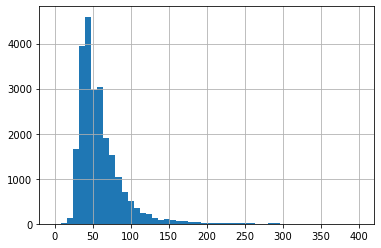

In [34]:
print(real_estate['total_area'].max()) #проверяем максимум для оценки диапазона, сначала дает это значение как верхний диапазон, затем в зависимости от распределения корректируем
real_estate['total_area'].hist(bins=50, range=(0, 400))  # строим гистограммы для каждого параметра:площадь, цена, число комнат, высота потолков.
plt.show()

763000000.0


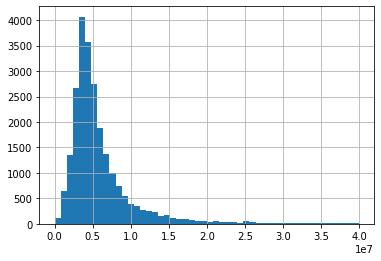

In [35]:
print(real_estate['last_price'].max()) #проверяем максимум для оценки диапазона
real_estate['last_price'].hist(bins=50, range=(0,40000000))  # строим гистограммы для каждого параметра: цена
plt.show()

19


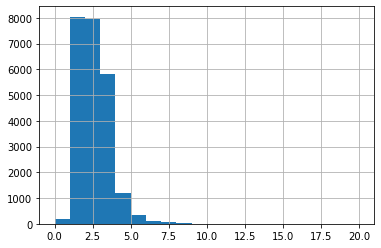

In [36]:
print(real_estate['rooms'].max()) #проверяем максимум для оценки диапазона
real_estate['rooms'].hist(bins=20, range=(0, 20))  # строим гистограммы для каждого параметра:число комнат
plt.show()

100.0


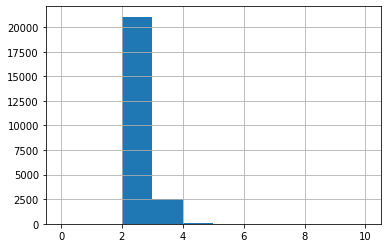

In [37]:
print(real_estate['ceiling_height'].max()) #проверяем максимум для оценки диапазона
real_estate['ceiling_height'].hist(bins=10, range=(0, 10))  # строим гистограммы для каждого параметра:высота потолков.
plt.show()

512.0


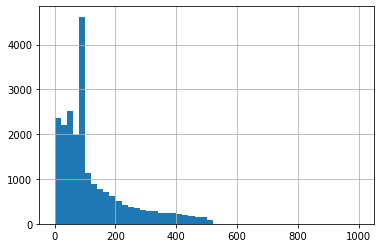

In [51]:
print(real_estate['days_exposition'].max()) #проверяем максимум для оценки диапазона
real_estate['days_exposition'].hist(bins=50, range=(0, 1000))  # строим гистограммы для времени продажи.
plt.show()


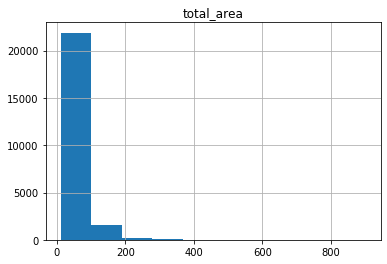

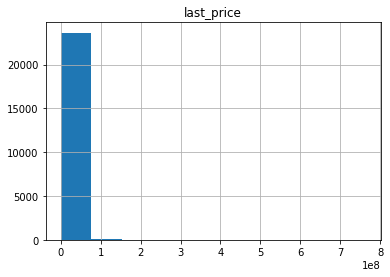

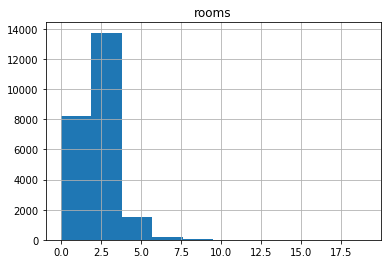

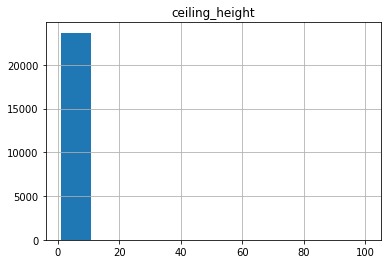

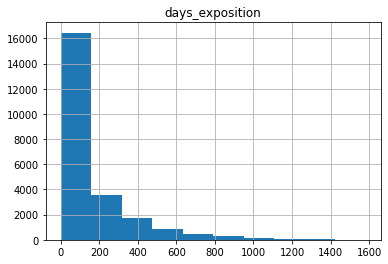

In [45]:
for column in real_estate[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']]: # автоматизируем функции выше
    real_estate[column].hist()
    plt.title(column)
    plt.show()

In [46]:
print('Среднее время продажи', real_estate['days_exposition'].mean(),'\n','Медианнов время продажи', real_estate['days_exposition'].median())

Среднее время продажи 169.36022616988058 
 Медианнов время продажи 95.0


In [47]:
real_estate['days_exposition'].describe() # посмотрим подробней описание данных

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

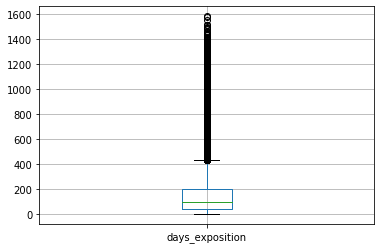

In [48]:
real_estate.boxplot('days_exposition') # на диаграмме видим ту же картину большим количеством выбросов в большую сторону
plt.show()

Из гистограммы времени продажи видно, что максимальны пик продаж приходится на количество дней от 0 до 160.
При этом среднее время продажи 169 день, а медиана - 90 дней.
Это говорит о большом разбросе в значениях величин - какие-то квартиры продаются очень медленно (об этом говорит и стандартное отклонение в 206), максимально время - 1580 дней.
Будем считать, что время, меньшее значения первого квартиля - очень быстрая продажа (45), больше третьего квартиля - очень медленная(199 дня).
Нетрудно также заметить, что очень много точер выбирается, поэтому для их отсечения возьмем 3 IQR, чтобы не потерять слишком много значений. Это примерно 650 дней.


In [52]:
real_estate = real_estate.query ('days_exposition < 650 ') #Убераем редкие и выбивающиеся значения.

512.0


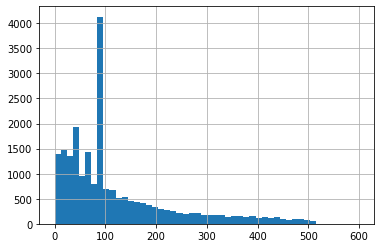

In [75]:
print(real_estate['days_exposition'].max()) #проверяем максимум для оценки диапазона - он значительно ниже нашей границы, отсекли сильно выпадающие значения
real_estate['days_exposition'].hist(bins=50, range=(0, 600))  # строим гистограммы для времени продажи.
plt.show()

После отсекания редких значений видим несколько пиков - 43-45 дни продажи, 60-62 дни продажи, 90-95 дни продажи.
Возможно, люди пересматривают цену, и это активирует продажу.

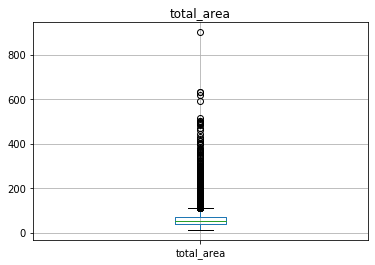

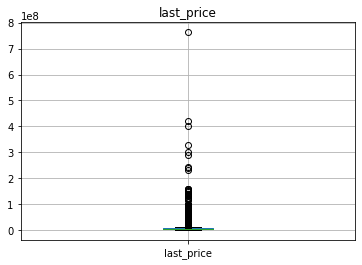

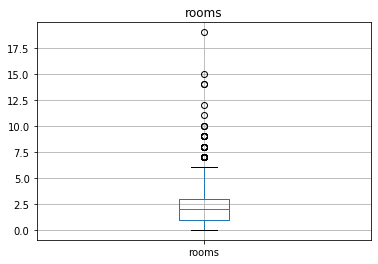

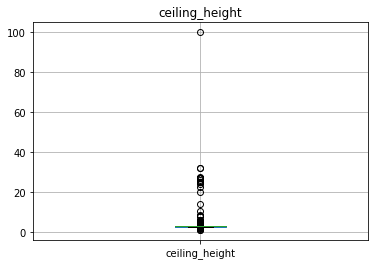

In [74]:
for column in real_estate[['total_area', 'last_price', 'rooms', 'ceiling_height']]:  # посмотрим распределение для других факторов
    real_estate.boxplot(column) 
    plt.title(column)
    plt.show()

Исходя из графиков отсекаем выпадающие точки.
Если плотность выпадающих точек очень высокая, увеличиваем стандартное 1,5 IQR в несколько раз.

In [78]:
real_estate = real_estate.query ('total_area < 500 ') #Убираем редкие и выбивающиеся значения, где площадь больше 500

In [79]:
real_estate['last_price'].describe()

count    2.202200e+04
mean     6.346217e+06
std      9.992216e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.699000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [81]:
real_estate = real_estate.query ('total_area < 20000000 ') #Убираем редкие и выбивающиеся значения, где цена больше 20000000

In [84]:
real_estate = real_estate.query ('rooms < 10 ') #Убираем редкие и выбивающиеся значения, где комнат больше 10

In [112]:
real_estate = real_estate.query ('ceiling_height < 20 ') #Убераем редкие и выбивающиеся значения, где высота потолков больше 20

In [115]:
real_estate.info() #проверяем, сколько осталось колонок после преобразований. По итогу удалили меньше 1% данных. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21993 entries, 0 to 23698
Data columns (total 30 columns):
total_images            21993 non-null int64
last_price              21993 non-null float64
total_area              21993 non-null float64
first_day_exposition    21993 non-null datetime64[ns]
rooms                   21993 non-null int64
ceiling_height          21993 non-null float64
floors_total            21993 non-null float64
living_area             21993 non-null float64
floor                   21993 non-null int64
is_apartment            21993 non-null bool
studio                  21993 non-null bool
open_plan               21993 non-null bool
kitchen_area            21993 non-null float64
balcony                 21993 non-null float64
locality_name           21949 non-null object
airports_nearest        21993 non-null float64
cityCenters_nearest     21993 non-null float64
parks_around3000        21993 non-null float64
parks_nearest           21993 non-null float64
ponds_a

In [116]:
def floor_pos(floor): #добавляем столбец, где первый этаж - 0, остальные 1, последний - 2
    for floor_cat in real_estate['floor_cat']:
        if floor == 'первый':
            return (0)
        if floor == 'другой':
            return (1)
        else:
            return (2)
real_estate['floor_char'] = real_estate['floor_cat'].apply(floor_pos)   

In [117]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,living_to_total,kitchen_to_total,floor_char
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой,0.472222,0.231481,1
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.6,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,3190.0,0.0,1344.0,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,17.0,9,True,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.106918,0.057233,1
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,1
5,10,2890000.0,30.4,2018-09-10,1,2.771499,12.0,14.4,5,True,False,False,9.1,0.0,городской посёлок Янино-1,84869.0,65968.0,0.0,3190.0,0.0,1344.0,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342,1


In [118]:
pd.set_option('display.max_columns', None)

In [89]:
real_estate.corr() #определяем коэффиценты корреляции 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total,floor_char
total_images,1.000000,0.109889,0.122320,0.106069,0.025496,0.016506,0.110356,0.034490,0.034503,-0.030190,-0.024602,0.109288,0.049991,-0.053009,-0.069595,0.038893,-0.043106,0.016856,-0.019348,0.004994,0.137768,-0.011290,0.007944,0.132537,-0.030417,-0.047574,0.043771
last_price,0.109889,1.000000,0.611911,0.347693,0.245847,-0.002587,0.522064,0.024833,-0.003296,-0.026966,-0.008454,0.406074,0.016606,-0.169935,-0.233355,0.207647,-0.176172,0.207669,-0.176564,0.055570,0.758683,0.003159,-0.002251,-0.024325,-0.062167,-0.118397,0.053427
total_area,0.122320,0.611911,1.000000,0.760127,0.323106,-0.072566,0.872700,-0.027577,-0.011224,-0.077820,-0.036987,0.554835,0.019929,-0.145381,-0.212336,0.199737,-0.173586,0.194926,-0.166862,0.097080,0.287440,-0.003217,0.000957,-0.050738,-0.029918,-0.381112,0.032681
rooms,0.106069,0.347693,0.760127,1.000000,0.179938,-0.229553,0.806164,-0.155887,-0.008253,-0.152553,-0.092949,0.234225,-0.007962,-0.121615,-0.156541,0.150624,-0.137519,0.113319,-0.096322,0.084965,0.044336,-0.003418,-0.005203,-0.028295,0.249325,-0.625856,-0.043162
ceiling_height,0.025496,0.245847,0.323106,0.179938,1.000000,-0.042847,0.295274,-0.018293,-0.020742,0.015038,0.010634,0.273880,-0.060290,-0.109838,-0.161102,0.194574,-0.158774,0.175423,-0.147475,0.061552,0.239406,-0.003042,0.004199,-0.078795,-0.037361,0.002580,0.019979
floors_total,0.016506,-0.002587,-0.072566,-0.229553,-0.042847,1.000000,-0.164135,0.675648,-0.000237,0.069354,0.051102,0.162920,0.173187,-0.084775,-0.128353,-0.155609,0.127648,-0.047079,0.006487,-0.040804,0.156370,0.013341,0.017794,-0.000581,-0.266231,0.340258,0.256413
living_area,0.110356,0.522064,0.872700,0.806164,0.295274,-0.164135,1.000000,-0.098081,-0.017301,-0.056270,-0.033871,0.381587,-0.001495,-0.135732,-0.187530,0.200755,-0.171465,0.168743,-0.141557,0.091864,0.201242,-0.006337,-0.005973,-0.044558,0.353058,-0.477583,0.001461
floor,0.034490,0.024833,-0.027577,-0.155887,-0.018293,0.675648,-0.098081,1.000000,-0.000227,0.036726,0.034876,0.130790,0.166678,-0.056454,-0.085819,-0.103717,0.086705,-0.027540,0.001050,-0.032275,0.133387,0.012380,0.019748,0.000860,-0.196882,0.234378,0.428149
is_apartment,0.034503,-0.003296,-0.011224,-0.008253,-0.020742,-0.000237,-0.017301,-0.000227,1.000000,0.001006,0.000455,-0.012751,-0.156738,0.008607,0.004270,-0.001661,-0.001723,-0.006666,0.001582,-0.062132,0.004021,0.009854,0.118208,0.229327,-0.007721,0.004829,-0.007312
studio,-0.030190,-0.026966,-0.077820,-0.152553,0.015038,0.069354,-0.056270,0.036726,0.001006,1.000000,-0.004373,-0.018171,0.027904,0.018954,0.025988,-0.032326,0.034741,-0.007526,0.004531,-0.027244,0.015607,-0.002543,0.000444,0.007962,0.093239,0.166644,0.011853


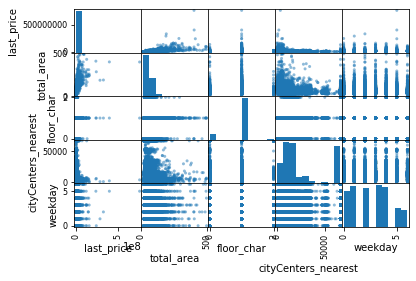

In [90]:
pd.plotting.scatter_matrix(real_estate[['last_price', 'total_area', 'floor_char', 'cityCenters_nearest', 'weekday']])
plt.show() # строим диаграммы попарного рассеивания

#### Смотрим коэффиценты корреляции цены от интересующих нас факторов:

    от общей площади          0,61 - средняя зависимость
    от количества комнат      0,35 - слабая зависимость
    от этажа                  0,05 - очень слабая зависимость
    от удаленности от центра -0,23 - очень слабая от обратная зависимость
    от дня недели             0,003 - можно сказать, нет
    от месяца                 0,002 - можно сказать, нет
    от года                  -0,024 - можно сказать, нет

In [91]:
real_estate_pivot = real_estate.pivot_table(index='locality_name', values='price_m2', aggfunc=('count','mean')) # для 10 населённых пунктов с наибольшим числом объявлений считаем среднюю цену квадратного метра
real_estate_pivot.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14534,114351.762546
посёлок Мурино,489,85947.150881
посёлок Шушары,420,78620.782911
Всеволожск,367,68690.935044
Пушкин,340,103068.288604
Колпино,324,75342.858280
посёлок Парголово,313,89891.093381
Гатчина,282,68946.673342
деревня Кудрово,268,92670.928672


In [92]:
real_estate_pivot.sort_values(by='mean', ascending=False).head() # Выделяем населённые пункты с самой низкой стоимостью жилья

,count,mean
locality_name,,
посёлок Лисий Нос,1,168706.697460
Зеленогорск,24,115122.799198
Санкт-Петербург,14534,114351.762546
посёлок Репино,3,112199.105429
Пушкин,340,103068.288604


In [93]:
print(real_estate_pivot.sort_values(by='mean').head()) # Выделяем населённые пункты с самой высокой стоимостью жилья

                       count          mean
locality_name                             
деревня Старополье         3  11206.221198
посёлок станции Свирь      2  11481.481481
деревня Вахнова Кара       1  11688.311688
деревня Выскатка           2  12335.480902
поселок Совхозный          2  12629.129129


Получаем результаты:
населенный пункт с самой высокой стоимость жилья -  Санкт-Петербург.
населенный пункт с самой низкой стоимостью метра - деревня Ставрополье.

In [94]:
real_estate_spb = real_estate[real_estate['locality_name'] == 'Санкт-Петербург'] # создаем таблицу для Санкт-Петербурга

In [95]:
real_estate_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14534 entries, 0 to 23694
Data columns (total 30 columns):
total_images            14534 non-null int64
last_price              14534 non-null float64
total_area              14534 non-null float64
first_day_exposition    14534 non-null datetime64[ns]
rooms                   14534 non-null int64
ceiling_height          14534 non-null float64
floors_total            14534 non-null float64
living_area             14534 non-null float64
floor                   14534 non-null int64
is_apartment            14534 non-null bool
studio                  14534 non-null bool
open_plan               14534 non-null bool
kitchen_area            14534 non-null float64
balcony                 14534 non-null float64
locality_name           14534 non-null object
airports_nearest        14534 non-null float64
cityCenters_nearest     14534 non-null float64
parks_around3000        14534 non-null float64
parks_nearest           14534 non-null float64
ponds_a

In [96]:
#real_estate_spb['cityCenters_km'] = real_estate_spb['cityCenters_nearest'] / 1000 # переводим в км

In [97]:
import warnings
warnings.filterwarnings('ignore') # Игнорирование всех предупреждений

In [98]:
def to_km(metres):
    km = metres / 1000
    return (km)
real_estate_spb['cityCenters_km'] = real_estate['cityCenters_nearest'].apply(to_km)

In [99]:
real_estate_spb['cityCenters_km'] = real_estate_spb['cityCenters_km'].round()

In [100]:
real_estate_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_cat,living_to_total,kitchen_to_total,floor_char,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой,0.472222,0.231481,1,16.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,17.0,9,True,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.106918,0.057233,1,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,1,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.771499,24.0,29.0,22,True,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,3190.0,0.0,1344.0,95.0,110544.692737,3,4,2019,другой,0.405028,0.263966,1,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.500000,9.0,43.6,7,True,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,3190.0,0.0,1344.0,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,1,15.0


In [101]:
cityCenters_km_pivot = real_estate_spb.pivot_table(index = 'cityCenters_km', values = 'price_m2', aggfunc = 'mean') #строим таблицу цен для разных растояний
print(cityCenters_km_pivot)

                     price_m2
cityCenters_km               
0.0             229804.139219
1.0             185945.236346
2.0             160919.451461
3.0             121061.547507
4.0             133882.565958
5.0             138892.598141
6.0             150676.838345
7.0             151769.448379
8.0             124070.966237
9.0             113850.186227
10.0            112248.817770
11.0            108417.605379
12.0            107838.054040
13.0            108576.766027
14.0            104520.559294
15.0            104227.884961
16.0            100619.097754
17.0             97133.686969
18.0             96498.973993
19.0             99084.612653
20.0            103090.817910
21.0             94201.604383
22.0             91891.581709
23.0             92012.738924
24.0             84566.647090
25.0             91531.371618
26.0             89285.876593
27.0            132115.709459
28.0             81161.915320
29.0             66418.254784
66.0            151644.231759


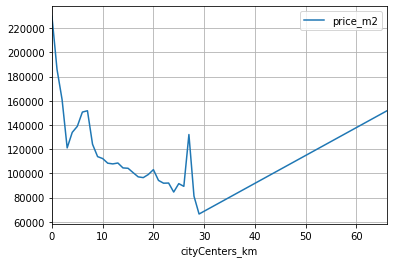

In [102]:
real_estate_spb.pivot_table(index = 'cityCenters_km', values = 'price_m2', aggfunc = 'mean').plot(grid=True)
plt.show()

График сильно меняется на 28 км - центральная зона.

In [103]:
real_estate_spb_central = real_estate_spb.query('cityCenters_km < 28') #создаем таблицу для квартир в центре

In [104]:
real_estate_spb_central.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14463 entries, 0 to 23694
Data columns (total 31 columns):
total_images            14463 non-null int64
last_price              14463 non-null float64
total_area              14463 non-null float64
first_day_exposition    14463 non-null datetime64[ns]
rooms                   14463 non-null int64
ceiling_height          14463 non-null float64
floors_total            14463 non-null float64
living_area             14463 non-null float64
floor                   14463 non-null int64
is_apartment            14463 non-null bool
studio                  14463 non-null bool
open_plan               14463 non-null bool
kitchen_area            14463 non-null float64
balcony                 14463 non-null float64
locality_name           14463 non-null object
airports_nearest        14463 non-null float64
cityCenters_nearest     14463 non-null float64
parks_around3000        14463 non-null float64
parks_nearest           14463 non-null float64
ponds_a

In [105]:
real_estate_spb_central.describe() #изучаем данные в таблице

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total,floor_char,cityCenters_km
count,14463.000000,1.446300e+04,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,1.446300e+04,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000
mean,10.272558,7.753847e+06,63.226015,2.138906,2.762231,11.452150,35.686725,6.266680,10.813375,0.586739,28220.401784,11724.153080,0.619858,1945.997165,0.756067,931.168292,123.082141,1.142264e+05,2.565097,6.422388,2017.485376,0.566587,0.187374,0.914402,11.718592
std,5.749926,1.188781e+07,36.778810,1.091066,0.268553,6.361868,22.192223,4.903088,5.997581,0.968632,11851.498699,4774.631043,0.781386,1361.940754,0.914753,454.826202,113.171867,5.157343e+04,1.784289,3.459014,0.943526,0.124642,0.075333,0.330954,4.795620
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.018417,0.000000,0.000000
25%,6.000000,4.200000e+06,41.500000,1.000000,2.600000,6.000000,20.000000,3.000000,7.500000,0.000000,18488.000000,8479.000000,0.000000,485.000000,0.000000,507.000000,45.000000,9.103216e+04,1.000000,3.000000,2017.000000,0.494382,0.132906,1.000000,8.000000
50%,10.000000,5.490000e+06,54.100000,2.000000,2.771499,9.000000,30.000000,5.000000,9.100000,0.000000,26977.000000,12348.000000,0.000000,3190.000000,1.000000,1172.000000,95.000000,1.046859e+05,3.000000,6.000000,2018.000000,0.568750,0.172102,1.000000,12.000000
75%,15.000000,7.950000e+06,73.000000,3.000000,2.771499,16.000000,42.800000,9.000000,12.000000,1.000000,36758.500000,14991.000000,1.000000,3190.000000,1.000000,1344.000000,158.000000,1.239279e+05,4.000000,10.000000,2018.000000,0.642857,0.232558,1.000000,15.000000
max,50.000000,7.630000e+08,495.000000,9.000000,14.000000,52.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,27431.000000,3.000000,3190.000000,3.000000,1344.000000,512.000000,1.907500e+06,6.000000,12.000000,2019.000000,2.307692,0.787879,2.000000,27.000000


In [106]:
real_estate_spb_central.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total,floor_char,cityCenters_km
total_images,1.000000,0.102073,0.107455,0.085689,0.028149,0.027604,0.097514,0.040221,0.038073,-0.023965,-0.013861,0.110127,0.064075,0.012493,-0.010582,0.022001,-0.019736,-0.006381,0.006189,0.002638,0.125819,-0.007007,0.009150,0.134613,-0.028640,-0.029657,0.046163,-0.009965
last_price,0.102073,1.000000,0.609785,0.354357,0.240817,-0.058194,0.526405,-0.004906,-0.002645,-0.026444,-0.002682,0.400706,0.009749,-0.011758,-0.263021,0.166825,-0.114494,0.170388,-0.123123,0.069389,0.787117,0.008802,-0.006563,-0.025434,-0.059693,-0.126851,0.036883,-0.263094
total_area,0.107455,0.609785,1.000000,0.759996,0.344139,-0.106755,0.877196,-0.039416,-0.006981,-0.069189,-0.023289,0.563902,-0.002105,-0.009517,-0.339279,0.182376,-0.133929,0.177050,-0.133434,0.117093,0.280369,0.000103,-0.004858,-0.056207,-0.029734,-0.373059,0.028879,-0.338637
rooms,0.085689,0.354357,0.759996,1.000000,0.214920,-0.262771,0.807830,-0.166181,-0.005186,-0.142792,-0.075157,0.257152,-0.030277,-0.046722,-0.284937,0.145238,-0.114376,0.094781,-0.068011,0.099698,0.033920,-0.007469,-0.007028,-0.032921,0.266013,-0.612400,-0.050944,-0.283516
ceiling_height,0.028149,0.240817,0.344139,0.214920,1.000000,-0.115581,0.326057,-0.058645,-0.014892,0.016899,0.010390,0.273307,-0.072596,-0.071180,-0.375537,0.200140,-0.148516,0.178633,-0.138132,0.082747,0.224066,-0.007780,0.005184,-0.075448,-0.025171,-0.025992,0.008856,-0.374747
floors_total,0.027604,-0.058194,-0.106755,-0.262771,-0.115581,1.000000,-0.197379,0.642627,0.003707,0.060742,0.041704,0.113472,0.209716,0.110211,0.350327,-0.244112,0.225094,-0.102591,0.061189,-0.032602,0.020089,0.024912,0.007846,0.010318,-0.288656,0.319409,0.232223,0.347382
living_area,0.097514,0.526405,0.877196,0.807830,0.326057,-0.197379,1.000000,-0.106636,-0.014507,-0.050193,-0.025955,0.400111,-0.020071,-0.035158,-0.333312,0.189043,-0.139117,0.150349,-0.110063,0.109641,0.199589,-0.005819,-0.007575,-0.050160,0.341646,-0.467178,-0.000684,-0.332302
floor,0.040221,-0.004906,-0.039416,-0.166181,-0.058645,0.642627,-0.106636,1.000000,-0.000662,0.026746,0.040552,0.100750,0.191659,0.067532,0.226012,-0.152432,0.142600,-0.056552,0.030813,-0.025552,0.049346,0.020277,0.009850,0.006052,-0.200124,0.210596,0.422294,0.224162
is_apartment,0.038073,-0.002645,-0.006981,-0.005186,-0.014892,0.003707,-0.014507,-0.000662,1.000000,0.008187,-0.001835,-0.005794,-0.150333,0.013086,0.017551,-0.010957,0.005417,-0.008097,0.001253,-0.078196,0.007163,0.000230,0.115561,0.239831,-0.015868,0.006939,-0.014898,0.016564
studio,-0.023965,-0.026444,-0.069189,-0.142792,0.016899,0.060742,-0.050193,0.026746,0.008187,1.000000,-0.003567,-0.021306,0.030858,-0.023148,0.016194,-0.031723,0.034128,0.006639,-0.011830,-0.028590,0.011844,0.000414,0.008681,0.009061,0.090017,0.143270,0.016473,0.015069


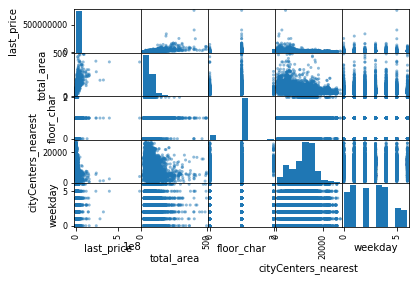

In [107]:
pd.plotting.scatter_matrix(real_estate_spb_central[['last_price', 'total_area', 'floor_char', 'cityCenters_nearest', 'weekday']])
plt.show() # строим диаграммы попарного рассеивания для центра

In [108]:
import seaborn as sns

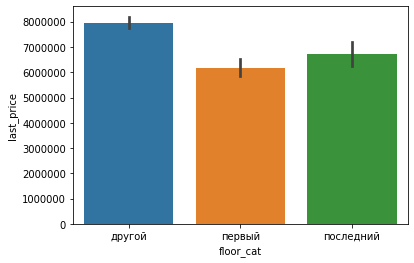

In [109]:
sns.barplot(x='floor_cat', y='last_price', data=real_estate_spb_central) # смотрим зависимость цены от этажа - сильной зависимости нет

In [110]:
real_estate_spb.corr() #определяем коэффиценты корреляции для всего города

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total,floor_char,cityCenters_km
total_images,1.000000,0.102885,0.107621,0.086251,0.029319,0.027738,0.098610,0.040197,0.037990,-0.023910,-0.013829,0.111260,0.063210,0.013573,-0.004627,0.021805,-0.019499,-0.006503,0.006335,0.001990,0.126142,-0.006820,0.007458,0.136163,-0.028494,-0.029180,0.046699,-0.004154
last_price,0.102885,1.000000,0.613187,0.355973,0.243406,-0.059122,0.528377,-0.005195,-0.001601,-0.026449,-0.002780,0.401716,0.013662,0.000631,-0.187088,0.163550,-0.111279,0.166955,-0.119828,0.069992,0.786745,0.007898,-0.005906,-0.024456,-0.062814,-0.127685,0.037106,-0.187478
total_area,0.107621,0.613187,1.000000,0.759649,0.345715,-0.108220,0.874749,-0.040264,-0.005931,-0.068782,-0.023216,0.560398,0.003276,0.003718,-0.244782,0.178396,-0.130173,0.173119,-0.129768,0.116530,0.282241,-0.000788,-0.003900,-0.054309,-0.034216,-0.373476,0.027846,-0.244690
rooms,0.086251,0.355973,0.759649,1.000000,0.216303,-0.263381,0.807381,-0.166724,-0.005168,-0.142269,-0.074888,0.256561,-0.027685,-0.041748,-0.222481,0.144076,-0.113346,0.093951,-0.067320,0.098938,0.034359,-0.008122,-0.007717,-0.031814,0.263595,-0.611734,-0.051360,-0.221651
ceiling_height,0.029319,0.243406,0.345715,0.216303,1.000000,-0.116919,0.327067,-0.059390,-0.014363,0.016684,0.010253,0.274671,-0.070435,-0.059685,-0.283708,0.197584,-0.145873,0.176106,-0.135575,0.082942,0.225268,-0.009203,0.004563,-0.073188,-0.026372,-0.025923,0.008211,-0.283538
floors_total,0.027738,-0.059122,-0.108220,-0.263381,-0.116919,1.000000,-0.197520,0.643530,0.004054,0.060692,0.041666,0.111499,0.208672,0.101712,0.273945,-0.242096,0.222775,-0.100959,0.059537,-0.033211,0.019422,0.025385,0.007369,0.010731,-0.285625,0.318346,0.233048,0.271980
living_area,0.098610,0.528377,0.874749,0.807381,0.327067,-0.197520,1.000000,-0.106530,-0.014268,-0.050037,-0.025884,0.398552,-0.017360,-0.028601,-0.257167,0.187222,-0.137507,0.148800,-0.108710,0.109047,0.200413,-0.006452,-0.007836,-0.049290,0.340150,-0.466833,0.000064,-0.256731
floor,0.040197,-0.005195,-0.040264,-0.166724,-0.059390,0.643530,-0.106530,1.000000,0.000067,0.026731,0.040491,0.099628,0.190633,0.063526,0.179168,-0.151302,0.141268,-0.055659,0.029905,-0.025868,0.049458,0.020433,0.009286,0.006686,-0.198003,0.209769,0.422441,0.177935
is_apartment,0.037990,-0.001601,-0.005931,-0.005168,-0.014363,0.004054,-0.014268,0.000067,1.000000,0.008142,-0.001850,-0.004873,-0.149290,0.014421,0.017353,-0.011163,0.005638,-0.008280,0.001462,-0.077312,0.008300,0.000141,0.115700,0.239075,-0.017015,0.007102,-0.014642,0.016554
studio,-0.023910,-0.026449,-0.068782,-0.142269,0.016684,0.060692,-0.050037,0.026731,0.008142,1.000000,-0.003549,-0.021313,0.030727,-0.023550,0.010063,-0.031399,0.033747,0.006906,-0.012105,-0.028525,0.011596,0.000442,0.008711,0.008788,0.089766,0.142632,0.016455,0.009181


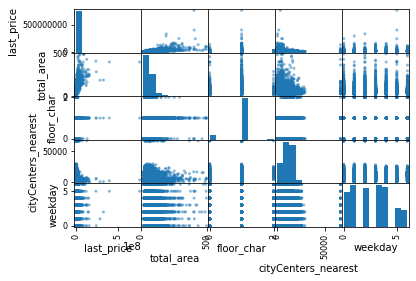

In [111]:
pd.plotting.scatter_matrix(real_estate_spb[['last_price', 'total_area', 'floor_char', 'cityCenters_nearest', 'weekday']])
plt.show() # строим диаграммы попарного рассеивания

 Для центра получили следующие зависимости цены от:
- число комнат                0,35 - слабая
- этаж                       -0,26 - очень слабая обратная
- удалённость от центра      -0,26 - очень слабая обратная
- день размещения объявления  0,008 - незначительная
- общая площадь               0,61  - средняя
    
По сравнению с общими данными о всех городах, тут чуть меньшие значимые зависимости: от общей площади 0,61 и от количества комнат 0,26 (против 0,64 и 0,35 соответсвенно)

Для всего Санкт-Петербурга получили следующие зависимости цены от:
- число комнат                0,37 - слабая
- этаж                       -0,18 - очень слабая обратная
- удалённость от центра      -0,18 - незначительная
- день размещения объявления  0,005 - незначительная
- общая площадь               0,65  - средняя
    
Цифры для центра всего города  сходны, при этом зависимость удаленности от центра нивилируется в случае центрального района. 
Для всего города данные практически идентичныданным по всем городам.

Диаграммы попарного рассеивания выглядят для всех вариантов подсчета примерно одинаковыми.

### Шаг 5. Общий вывод

При анализе данных определили, что пик продаж приходится на:
   - квартиры с площадью в диапазоне 28-50 м2
   - ценой от 2.5 до 6 млн
   - количеством комнат от 1 до 3
   - c пиками продаж в интервалах 43-45 дней, 60-62 и 93-96 дней от подачи объявления
   - с высотой потолков от 2м до 3м

Изучили стоимость м2 в разных городах.

Получили ожидаемые результаты: населенный пункт с самой высокой стоимость жилья Санкт-Петербург.
Населенный пункт с самой низкой стоимостью метра - деревня Ставрополье.

Получили коэффиценты корреляции и оценили зависимости цены от интересующих нас факторов:

    - от общей площади             0,61 - средняя зависимость
    - от количества комнат         0,35 - слабая зависимость
    - от этажа                     0,05 - очень слабая от обратная зависимость
    - от удаленности от центра    -0,023 - можно сказать, нет
    - от месяца                    0,002 - можно сказать, нет
    - от года                     -0,024 - можно сказать, нет


Для центра получили следующие зависимости цены от:

    - число комнат                 0,36 - слабая
    - этаж                        -0,036 - очень слабая обратная
    - удалённость от центра       -0,19 - очень слабая обратная
    - день размещения объявления   0,006 - незначительная
    - общая площадь                0,61 - средняя

По сравнению с общими данными о всех городах, тут примерно такие же зависимости.

Для всего Санкт-Петербурга получили следующие зависимости цены от:

    - число комнат                  0,37 - слабая
    - этаж                         -0,04 - очень слабая обратная
    - удалённость от центра        -0,18 - незначительная
    - день размещения объявления    0,008 - незначительная
    - общая площадь                 0,61 - средняя

Для всего города данные практически идентичны данным как в центре, так по всем городам.

Диаграммы попарного рассеивания выглядят для всех вариантов подсчета примерно одинаковыми.

Основной вывод:
в первую очередь, цена квартиры зависит от ее площади, во-вторую - от числа комнат (в меньшей степени).
Поэтому необходимо с подозрением относится к квартирам, оцененым несоизмеримо с ее площадью.
